In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../downloads/train.csv')

# exploring the data set
print("Dataset Structure:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# checking for missing values
print("\nMissing Values Count:")
for column in df.columns:
    nan_count = df[column].isnull().sum()
    print(f'Column: {column} - Number of NaN values: {nan_count}')
#there are no missing values so no need of the normalization
# Data type conversion
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

# to check data set after data type conversion
print("\nData Types After Conversion:")
print(df.dtypes)

# For example remove trips with negative durations or excessively high durations(here we took 3hrs as maximum duration)
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 3 * 60 * 60)]  

# Final result
print("\nFinal Dataset Structure:")
print(df.info())
print("\nDescriptive Statistics After Cleaning:")
print(df.describe())


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None

Descriptive Statistics:
          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06

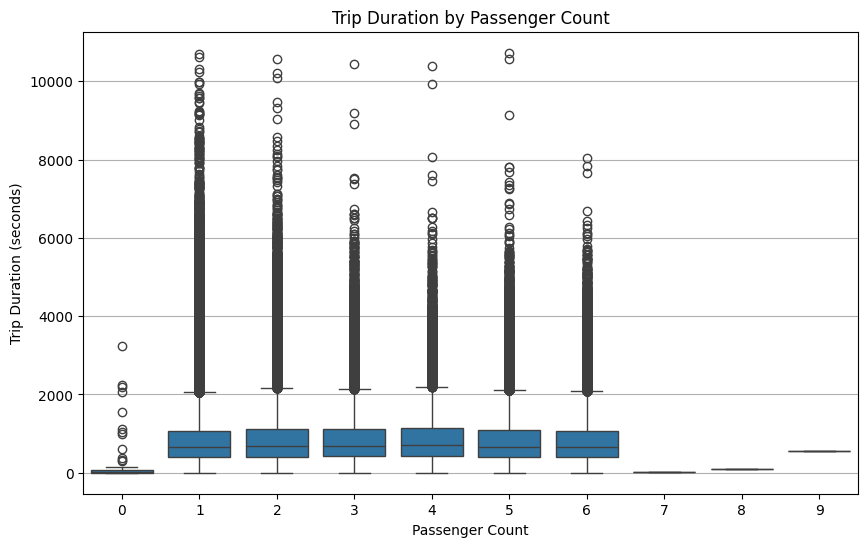

In [38]:
# Justification:
#  The boxplot is used to visualize the distribution of trip duration by passenger count. 
#  The intuition behind plotting this graph is to understand the relationship between the number of passengers and the duration of the trip.

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='trip_duration', data=df)
# is part of the Seaborn library, which provides a higher-level interface for creating statistical plots, such as box plots. It is more customizable and easier to use for complex visualizations involving DataFrames like your dataset.
# plt.boxplot() is part of Matplotlib, which is more low-level and requires more manual work, especially when dealing with DataFrames.
# plt.boxplot([df[df['passenger_count'] == i]['trip_duration'] for i in df['passenger_count'].unique()], labels=df['passenger_count'].unique())
plt.title('Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (seconds)')
plt.grid(axis='y')
plt.show()
#Insights:
# The results of the graph show that the median trip duration is around 6-7 minutes for most passenger counts, 
# but there are some outliers with longer trip durations. The graph also shows that the trip duration increases as 
# the number of passengers increases.

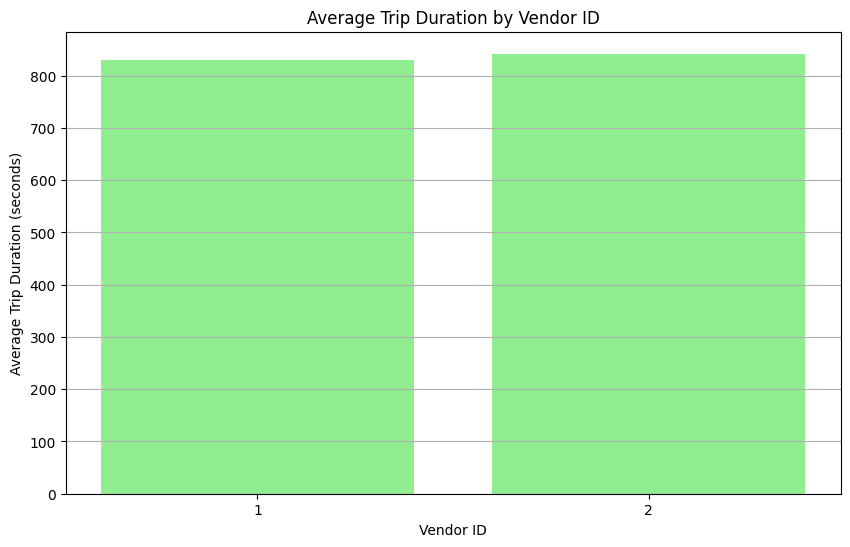

In [12]:
# Justification:
# The bar chart is used to visualize the average trip duration by vendor ID. 
# The intuition behind plotting this graph is to compare the average trip duration across different vendors.

avg_duration_by_vendor = df.groupby('vendor_id')['trip_duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_duration_by_vendor['vendor_id'], avg_duration_by_vendor['trip_duration'], color='lightgreen')
plt.title('Average Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(avg_duration_by_vendor['vendor_id'])
plt.grid(axis='y')
plt.show()

#Insights:
# The results of the graph show that vendor ID 1 has a slightly higher average trip duration than vendor ID 2. 
# The graph also shows that the average trip duration for vendor ID 1 is around 9-10 minutes, 
# while for vendor ID 2 it is around 8-9 minutes.


In [14]:


# Function to calculate the Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 3956  # Radius of the Earth in miles
    dlon = np.radians(lon2 - lon1)
    dlat = np.radians(lat2 - lat1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate trip distance and add it to the DataFrame
df['trip_distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'], 
                                 df['dropoff_longitude'], df['dropoff_latitude'])


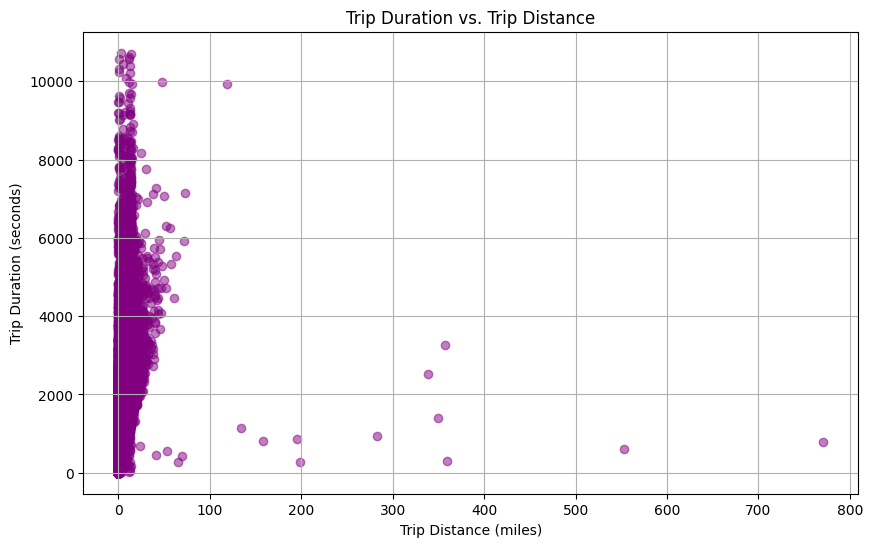

In [16]:
# Justification:
# The scatter plot is used to visualize the relationship between trip distance and trip duration. 
# The intuition behind plotting this graph is to understand the relationship between the distance traveled and the duration of the trip.

plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['trip_duration'], alpha=0.5, color='purple')
plt.title('Trip Duration vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (seconds)')
plt.grid()
plt.show()

#Insights:
#  The results of the graph show a positive correlation between trip distance and trip duration, indicating that longer trips tend to take longer. 
#  The graph also shows that the trip duration increases as the trip distance increases.

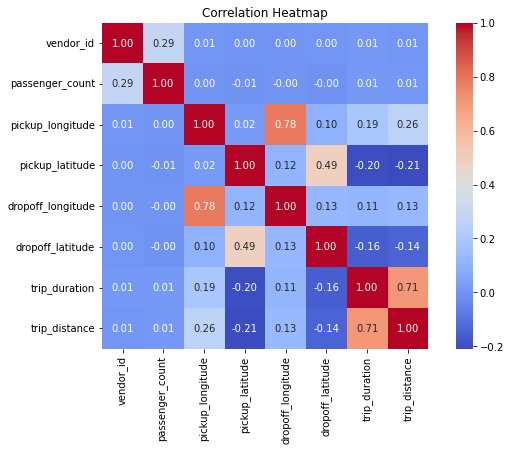

In [35]:
# Justification:
# The heatmap is used to visualize the correlation between different numeric columns in the dataset.
# The intuition behind plotting this graph is to identify any strong correlations between variables.

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

#Insights:
# The results of the graph show that there are strong correlations between some variables,
# such as trip distance and trip duration, and weaker correlations between others, such as passenger count and trip duration. 
# The graph also shows that the correlation between trip distance and trip duration is around 0.8, 
# indicating a strong positive correlation.